# **Training a CNN on mnist handwritten digits dataset**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
(x1_train, y1_train) , (x1_test, y1_test) = mnist.load_data()

In [ ]:
x1_train.shape

(60000, 28, 28)

In [ ]:
#images are black and white so it contains only one channel
x_train = x1_train.reshape(60000,28,28,1)
x_test = x1_test.reshape(10000,28,28,1)

In [ ]:
#convert the target variables to categorical data
from tensorflow.keras import utils
y_train = utils.to_categorical(y1_train, 10)
y_test = utils.to_categorical(y1_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


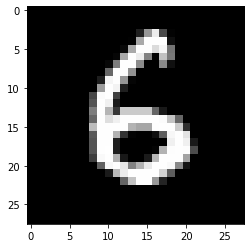

In [ ]:
#viewing how the input data and corresponding target variable looks like
import matplotlib.pyplot as plt
plt.imshow(x1_train[106], cmap='gray')
print(y_train[106])
#it represents the digit 6
#use np.argmax(y_train[106] to get the actual number)

# **Building the CNN Model**

In [ ]:
model = Sequential()
input_layer = Dense(32, input_shape=(28,28,1))
model.add(input_layer)
#better to take no. of nodes in multiples of 32 when working with images

Create the convolution layers

In [ ]:
from tensorflow.keras.layers import Conv2D
conv_layer1 = Conv2D(32, kernel_size=(3,3), activation='relu')
conv_layer2 = Conv2D(64, (3, 3), activation='relu')
model.add(conv_layer1)
model.add(conv_layer2)
#(3,3) is default kernel size

Create the MaxPooling and Dropout layers

In [ ]:
from tensorflow.keras.layers import MaxPool2D, Dropout, Flatten
pool_layer = MaxPool2D(pool_size=(2,2))
drop_layer = Dropout(0.5)
flat_layer = Flatten()
model.add(pool_layer)
model.add(drop_layer)
model.add(flat_layer)

In [ ]:
output_layer = Dense(10, activation='softmax')
model.add(output_layer)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 274s 145ms/step - loss: 0.3277 - accuracy: 0.9313 - val_loss: 0.0785 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 259s 138ms/step - loss: 0.1056 - accuracy: 0.9689 - val_loss: 0.0583 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 265s 141ms/step - loss: 0.0853 - accuracy: 0.9743 - val_loss: 0.0478 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0657 - accuracy: 0.9788 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 252s 134ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0477 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0387 - accuracy: 0.9877 - val_

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 10s 31ms/step - loss: 0.0410 - accuracy: 0.9881
0.041007500141859055 0.988099992275238


In [ ]:
#prediction
import numpy as np
arr = model.predict([x1_train[350].reshape(1,28,28,1)])
label = np.argmax(arr)
print(label)

1/1 [==============================] - 0s 29ms/step
9


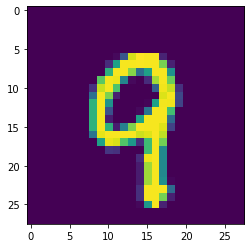

In [ ]:
plt.imshow(x1_train[350])

In [ ]:
model.save("model.h5")
print("Model saved")

Model saved


# **Visualizing how accuracy varies with each epoch**

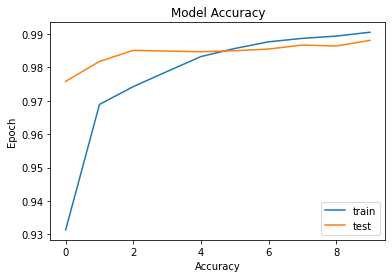

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

# **Visualising how loss varies with each epoch**

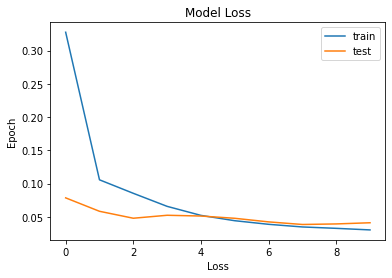

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()